## The geometrical efficiency of the detector calculated from the previous part

In [1]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.29433
R=2.54
t=0.015
h=5.1
z=1
i=0

x_positions=[]
y_positions=[]
r_initial=[]
r_final=[]
h_initial=[]
h_final=[]
geom_eff=[]


for k in numpy.arange(-2, 2.2, 0.2): 
      x_positions.append(k)

        
        
for j in numpy.arange(-2, 2.2, 0.2):
        
                r_s=math.sqrt(i**2+j**2+z**2)
                r_i=abs(i)-(R+t)
                r_initial.append(r_i)
                r_f=abs(i)+(R+t)
                r_final.append(r_f)
                h_i=abs(j)-h/2
                h_initial.append(h_i)
                h_f=abs(j)+h/2
                h_final.append(h_f)
                geometrical_efficiency=(z/r_s)*(1/(4*math.pi))*((numpy.arctan(r_f*h_f/r_s*math.sqrt(r_s**2+r_f**2+h_f**2))+numpy.arctan(r_i*h_i/r_s*math.sqrt(r_s**2+r_i**2+h_i**2)))-(numpy.arctan(r_f*h_i/r_s*math.sqrt(r_s**2+r_f**2+h_i**2))+numpy.arctan(r_i*h_f/r_s*math.sqrt(r_s**2+r_i**2+h_f**2))))
                geom_eff.append(geometrical_efficiency)

                
with open("axial_geo_twoin.csv", "w") as out_file:
     for number in geom_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
        
data=pd.read_csv("axial_geo_twoin.csv",names=['Calculation'])
data.to_csv("axial_geo_twoinupdated.csv")


                
print("These are the values of r_i:")                
for i in r_initial: 
    print(i)
print("These are the values of r_f:")
for i in r_final:
    print(i)
    
    
plt.scatter(x_positions,geom_eff, color="none", edgecolor="red", label="Experimental")
plt.xlabel("Diagonal position of the source (x=y)(%)")
plt.ylabel("The geometrical efficiency (%)")
plt.savefig("axitwo_geo.pdf", bbox_inches='tight')
plt.show()


0.19035532407715927
0.21631063032746156
0.24270069866741611
0.2711685858051997
0.3026734714122574
0.33762897236358874
0.3756174536996822
0.41473428222879377
0.4507758365705678
0.47714883929456103
0.486964154921187
0.47714883929456114
0.45077583657056797
0.4147342822287939
0.3756174536996824
0.3376289723635889
0.3026734714122576
0.2711685858051998
0.2427006986674162
0.2163106303274617
0.19035532407715938
These are the values of r_i:
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
-2.555
These are the values of r_f:
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555
2.555


<Figure size 640x480 with 1 Axes>

# Calculation of intrinsic detection efficiency of a cylindrical NaI(Tl) detector

### Calculation of survival paobablity of photon inside the layers

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.1555102709637914
0.1507876562511535
0.14684371868255436
0.14359280538691646
0.14095269196311372
0.13884884330234895
0.13721672080119007
0.1360029374841101
0.13516578232307486
0.13467542240254665
0.13451395756247592
0.1346754224025467
0.13516578232307488
0.13600293748411002
0.13721672080119013
0.13884884330234887
0.14095269196311358
0.14359280538691646
0.14684371868255439
0.15078765625115353
0.15551027096379144


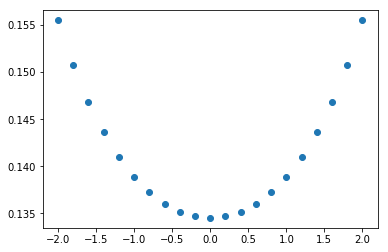

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.015
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)

plt.plot(y_positions,integral_survive, 'o')
plt.show()

### Calculation of the interaction probability of photon inside the NaI(Tl) crystal

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.015
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


367.7416165740202
338.63951809254127
312.3753554284991
289.0404118154395
268.70863728010005
251.4359542098825
237.2625572315535
226.21612730593472
218.31489864292618
213.57013960564302
211.98791729312214
213.57013960564313
218.31489864292627
226.21612730593444
237.26255723155353
251.43595420988214
268.7086372800998
289.04041181543954
312.3753554284992
338.63951809254127
367.7416165740202


### Calculation of intrinsic efficiency of the detector

-----------------------------
Thease are the products
57.18759843808857
51.06265924719439
45.870358815905455
41.504123602768594
37.875205778369995
34.91159140666456
32.556390072218456
30.766057819886534
29.50870406785391
28.762648763960833
28.515333710524686
28.762648763960858
29.508704067853927
30.766057819886473
32.55639007221848
34.91159140666449
37.87520577836993
41.5041236027686
45.87035881590547
51.062659247194404
57.18759843808858
THIS IS COEFFICIENT1
[0.5681, 0.59309, 0.6208, 0.6488, 0.6785, 0.7141, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
32.48827467267812
30.28475257291852
28.476318752914107
26.927875393476267
25.698327120624043
24.930367423499163
24.76239028892936
25.280469710600766
26.430946233576748
27.81060508987373
28.515333710524686
27.810605089873754
26.430946233576762
25.280469710600716
24.762390288929375
24.930367423499113
25.698327120623997
26.92787539347627
28.476318752914114
30.284752572918528
32.48827467267812
This is the end of the el

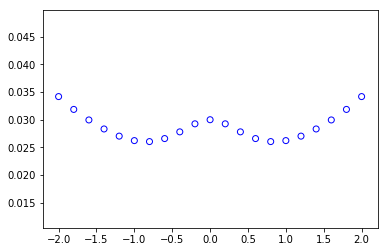

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681, 0.59309, 0.6208, 0.6488, 0.6785, 0.7141, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    

with open("axial_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)

data=pd.read_csv("axial_intr_twoin.csv",names=['Calculation'])
data.to_csv("axial_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("axitwo_intr.pdf", bbox_inches='tight')
plt.show()

### Calculation of absolute detection efficiency of the detector

0.006509806372658326
0.006895698861430756
0.007274971007166628
0.007686309357039573
0.00818758092535478
0.008860225614571277
0.009790722092468824
0.011036502589297652
0.012541507262939218
0.013968208356539643
0.01461678461330662
0.01396820835653966
0.01254150726293923
0.011036502589297635
0.009790722092468836
0.008860225614571263
0.00818758092535477
0.007686309357039577
0.007274971007166633
0.006895698861430762
0.0065098063726583295


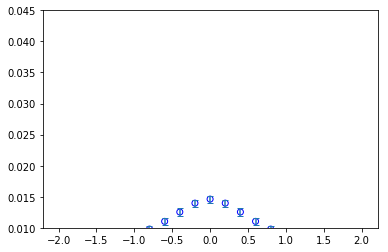

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.015
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geom_eff,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("axial_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("axial_total_twoin.csv",names=['Calculation'])
data.to_csv("axial_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.ylim(0.01,0.045)
plt.savefig("axitwo_total.pdf", bbox_inches='tight')
plt.show()